In [1]:
#Import all the dependies needed for the task 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st 
import numpy as np

#Show the files we will be using 
mouse_data_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

#Read the files allowing us to access them more freely
mouse_metadata = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#Combine the data into one dataset
merged_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")

#Display the combine data
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Check the number of mice in the dataset 
mice = len(merged_data["Mouse ID"].unique())
print(f"There are {mice} different mice in this dataset")

There are 249 different mice in this dataset


In [5]:
#Get rid of duplicates
cleaned_merged_data = merged_data.drop_duplicates()

In [6]:
#Genreate the statistics fort the summary table
tumor_mean = cleaned_merged_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = cleaned_merged_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = cleaned_merged_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = cleaned_merged_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = cleaned_merged_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

#Create the summary table
tumor_summary = pd.DataFrame({"Mean": tumor_mean, 
                              "Median": tumor_median,
                              "Variance": tumor_variance,
                              "Standard Deviavtion": tumor_std,
                              "Standard Error Mean": tumor_sem})

#Print the summary table 
tumor_summary

,Mean,Median,Variance,Standard Deviavtion,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


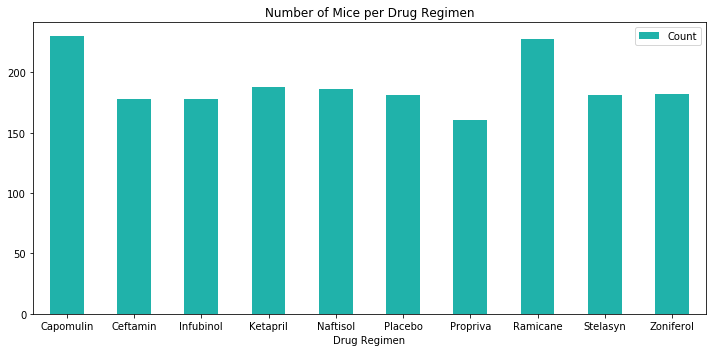

In [82]:
#Create a bar graph using pandas for total number of mice for each treatment 
drug_group = merged_data.groupby("Drug Regimen")

#Find the number of mice 
mice_group = drug_group["Mouse ID"].count()

#Set up the chart
mice_chart = mice_group.plot(kind= "bar", figsize= (10,5), title = "Number of Mice per Drug Regimen",
                             color = "lightseagreen", rot = 0)

#Print the chart
mice_chart

#Clean the chart up and add legend
plt.legend(["Count"])
plt.tight_layout()

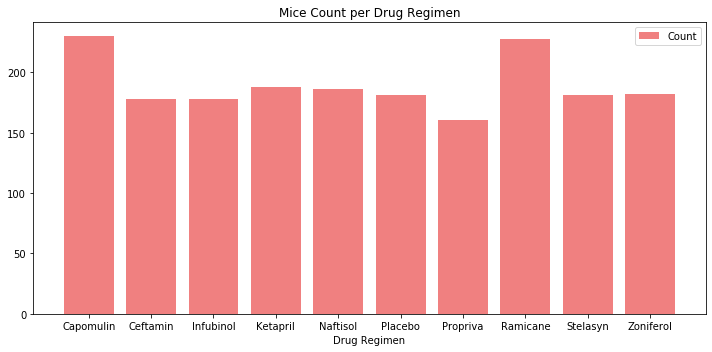

In [8]:
#Create a bar graph using matplotlib for total number of mice for each treatment 
#Set up the x_axis
regimens = tumor_summary.index
x_axis = np.arange(len(regimens))

#Set up the bar chart
plt.figure(figsize = (10,5))
plt.bar(x_axis, mice_group, align = "center", color = "lightcoral")

#Set tick loctaions 
tick_locs = [value for value in x_axis]
plt.xticks(tick_locs, regimens)

#Set title and legend
plt.title("Mice Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.legend(["Count"])
plt.tight_layout()

In [9]:
#Now we will create pie charts showing the distribution of male and female mice
gender_group = merged_data.groupby("Sex").count().reset_index()
gender_group.count()

#Set the data range to just sex and number of mice
gender_group = gender_group[["Sex", "Mouse ID"]]
gender_group.head()

#Changes chart colors
colors = ["pink", "blue"]

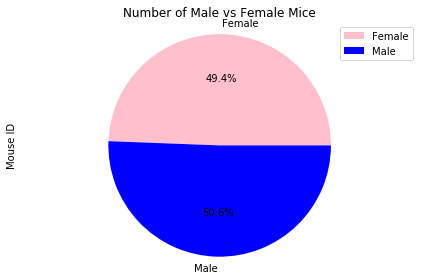

In [10]:
#Create the pie chart using Pandas
gender_pie = gender_group.plot(kind= "pie", y= "Mouse ID", labels= gender_group["Sex"], autopct='%1.1f%%', 
                      title = "Number of Male vs Female Mice", colors = colors)

#Clean up the chart
plt.legend()
plt.axis("equal")
plt.tight_layout()

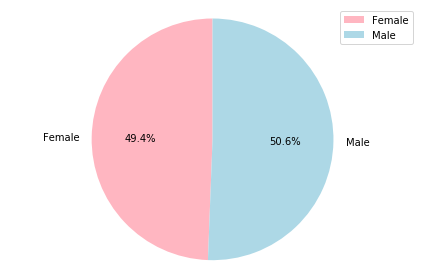

In [11]:
#Create a pie chart showing male vs female mice using pyplot
#Set the labels 
labels = ["Female", "Male"]

#Set the colors
colors = ["lightpink","lightblue"]

#Create the pie chart
plt.pie(gender_group["Mouse ID"], labels = labels, colors = colors,
       autopct='%1.1f%%', startangle = 90)

#Clean up the chart 
plt.legend()
plt.axis("equal")
plt.tight_layout()

In [12]:
#Find the best treatment between Capomulin, Ramicane, Infubinol, and Ceftamin in each mouse
merged_data.head()

#Get the columns we are looking at
treatment_columns = merged_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

#Sort by the greatest timepoint so that we can see the greatest tumor volume in each mouse
time_sort = treatment_columns.loc[treatment_columns["Timepoint"] == 45]
time_sort.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472


In [13]:
#Find all the mice treated with Capomulin
cap_data = time_sort[time_sort["Drug Regimen"].isin(["Capomulin"])].reset_index()

#Sort the data in order of Tumor Volume
cap_data.sort_values(["Tumor Volume (mm3)"])

#Create the list of just Tumor Volume
cap_data = cap_data["Tumor Volume (mm3)"]
cap_data

0     23.343598
1     28.484033
2     28.430964
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     37.311846
9     36.041047
10    37.074024
11    38.846876
12    38.939633
13    38.982878
14    38.125164
15    40.658124
16    40.159220
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

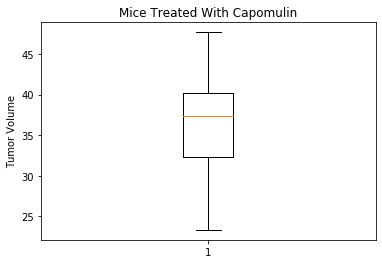

In [14]:
#Create the box plot to visually see the outliners in the data for Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title("Mice Treated With Capomulin")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(cap_data)
plt.show()

In [15]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volume is: {lowerq}")
print(f"The upper quartile of the Tumor Volume is: {upperq}")
print(f"The interquartile of the Tumor Volume is: {iqr}")
print(f"The the median of the Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volume is: 32.37735684
The upper quartile of the Tumor Volume is: 40.1592203
The interquartile of the Tumor Volume is: 7.781863460000004
The the median of the Tumor Volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
#Find all the mice treated with Ramicane
ram_data = time_sort[time_sort["Drug Regimen"].isin(["Ramicane"])].reset_index()

#Sort the data in order of Tumor Volume
ram_data.sort_values(["Tumor Volume (mm3)"])

#Create the list of just Tumor Volume
ram_data = ram_data["Tumor Volume (mm3)"]
ram_data

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.560470
6     31.095335
7     33.397653
8     32.978522
9     33.562402
10    36.134852
11    38.810366
12    37.225650
13    36.374510
14    37.311236
15    38.407618
16    40.659006
17    40.667713
18    45.220869
19    43.047543
Name: Tumor Volume (mm3), dtype: float64

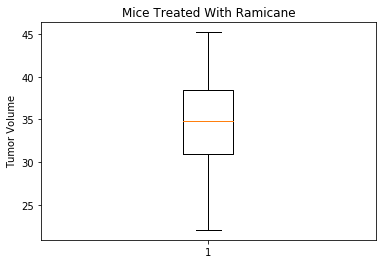

In [17]:
#Create the box plot to visually see the outliners in the data for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title("Mice Treated With Ramicane")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(ram_data)
plt.show()

In [18]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ram_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volume is: {lowerq}")
print(f"The upper quartile of the Tumor Volume is: {upperq}")
print(f"The interquartile of the Tumor Volume is: {iqr}")
print(f"The the median of the Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volume is: 30.981175224999998
The upper quartile of the Tumor Volume is: 38.508305307499995
The interquartile of the Tumor Volume is: 7.527130082499998
The the median of the Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [19]:
#Find all the mice treated with Infubinol
inf_data = time_sort[time_sort["Drug Regimen"].isin(["Infubinol"])].reset_index()

#Sort the data in order of Tumor Volume
inf_data.sort_values(["Tumor Volume (mm3)"])

#Create the list of just Tumor Volume
inf_data = inf_data["Tumor Volume (mm3)"]
inf_data

0    67.973419
1    65.525743
2    66.083066
3    72.226731
4    62.435404
5    60.918767
6    66.196912
7    67.685569
8    62.754451
Name: Tumor Volume (mm3), dtype: float64

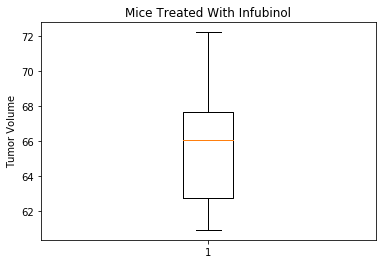

In [20]:
#Create the box plot to visually see the outliners in the data for Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title("Mice Treated With Infubinol")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(inf_data)
plt.show()

In [21]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = inf_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volume is: {lowerq}")
print(f"The upper quartile of the Tumor Volume is: {upperq}")
print(f"The interquartile of the Tumor Volume is: {iqr}")
print(f"The the median of the Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volume is: 62.75445141
The upper quartile of the Tumor Volume is: 67.68556862
The interquartile of the Tumor Volume is: 4.9311172099999965
The the median of the Tumor Volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [22]:
#Find all the mice treated with Ceftamin
cef_data = time_sort[time_sort["Drug Regimen"].isin(["Ceftamin"])].reset_index()

#Sort the data in order of Tumor Volume
cef_data.sort_values(["Tumor Volume (mm3)"])

#Create the list of just Tumor Volume
cef_data = cef_data["Tumor Volume (mm3)"]
cef_data

0     62.999356
1     61.849023
2     68.923185
3     67.748662
4     59.851956
5     64.299830
6     59.741901
7     61.433892
8     67.527482
9     64.634949
10    61.386660
11    68.594745
12    64.729837
Name: Tumor Volume (mm3), dtype: float64

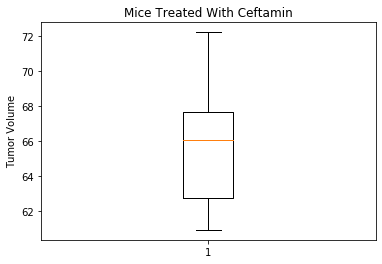

In [23]:
#Create the box plot to visually see the outliners in the data for Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("Mice Treated With Ceftamin")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(inf_data)
plt.show()

In [24]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cef_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Tumor Volume is: {lowerq}")
print(f"The upper quartile of the Tumor Volume is: {upperq}")
print(f"The interquartile of the Tumor Volume is: {iqr}")
print(f"The the median of the Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Tumor Volume is: 61.43389223
The upper quartile of the Tumor Volume is: 67.52748237
The interquartile of the Tumor Volume is: 6.093590140000003
The the median of the Tumor Volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [99]:
#Create a line plot to show the timepoint vs tumor volume for mice treated with Capomulin
cap_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
fixed_cap_df = cap_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
fixed_cap_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876


In [100]:
#Select a single mouse's data
cap_mouse_data = fixed_cap_df.loc[cap_df["Mouse ID"] == "s185"]
cap_mouse_data

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


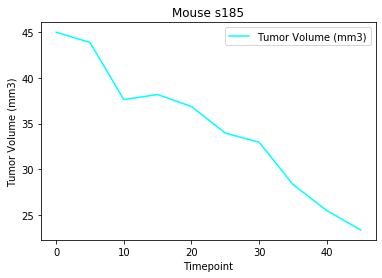

In [136]:
#Set up the line plot
#Set the x and y axis
x_axis = cap_mouse_data["Timepoint"]
y_axis = cap_mouse_data["Tumor Volume (mm3)"]

#Plot the values
cap_mouse_chart = plt.plot(x_axis, y_axis, color = "cyan")

#Clean the chart
plt.title("Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(["Tumor Volume (mm3)"])

In [114]:
#Create a scatter plot of the same mouse's weight vs tumor volume for the Capomulin Regimen
#Set up the dataframe with the columns we need to look at 
weight_cap_df = cap_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_cap_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


In [134]:
#Group by Mouse ID
group_weight = weight_cap_df.groupby(["Mouse ID", "Weight (g)"])

#Get the average weight of each mouse 
avg_group_weight = pd.DataFrame(group_weight["Tumor Volume (mm3)"].mean()).reset_index()
avg_group_weight.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


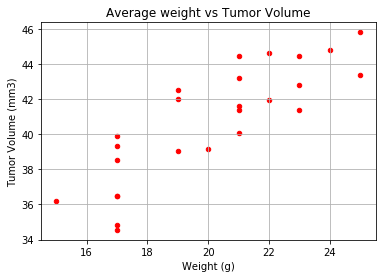

In [143]:
#Set the X and Y axis
#x_axis = group_weight[
#y_axis = group_weight[]

#Create the scatter plot
avg_group_weight.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", grid = "true",
                      color = "red", title= "Average weight vs Tumor Volume") 

plt.show()